### SWE582_Homework4

Suppose we are given a data set $(y_i, x_i)$ for $i=1\dots N$

Assume we have a basis regression model (for example a polynomial basis where $f_k(x) = x^k$) and wish to fit
$y_i = \sum_k A_{ik} w_k + \epsilon_i$
for all $i = 1 \dots N$ where 
$
A_{ik} = f_k(x_i)
$

Assume the prior

$
w \sim \mathcal{N}(w; 0, P)
$

Derive an expression for $p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N})$ and implement a program that plots the mean and corresponding errorbars (from standard deviation of $p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N})$) by choosing $y_{\text{new}}$ on a regular grid. 

Note that $y_{\text{new}} = \sum f_k(x_{\text{new}}) w_k + \epsilon$

### Derivation
$$
p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N}) = \int p(y_{\text{new}}|x_{\text{new}},w) \ p(w|y,X) \ dw
$$

#### Bayes' Rule
\begin{eqnarray}
p(X|Y,Z) &=& \frac{p(Y|X,Z) . p(X,Z)}{p(Y,Z)} \\
&=& \frac{p(Y|X,Z) . p(X|Z) . p(Z)} {p(Y|Z) . p(Z)} \\
&=& \frac{p(Y|X,Z) . p(X|Z)} {p(Y|Z)}
\end{eqnarray}

We use the above formula:
$$
p(w|y,X) = \frac{p(y|X,w) . p(w)} {p(y|X)}
$$

$$
p(w|y,X) \sim p(y|X,w) . p(w)
$$

\begin{eqnarray}
p(y|X,w) &=& \prod_{i=1}^{N} p(y_{i}|x_{i},w) \\
&=& \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi s}}  \frac{(y_{i}-x_{i}^{T}w)^2} {2s} \\
&=& \mathcal{N} (X^{T}w,sI) \\
\end{eqnarray}

$$ 
\text{and} \\
w \sim \mathcal{N}(w; 0, P) 
$$

$$
\text{therefore} \\
p(w|y,X) \sim exp(-\frac{1}{2s} (y-X^{T}w))^T (y-X^{T}w) \ exp(-\frac{1}{2}(w-0)^{T} P^{-1} (w-0))
$$

$$
 \sim exp \left(-(\frac{1}{2s}(y-X^{T}w))^T (y-X^{T}w) + \frac{1}{2} w^{T} P^{-1}w)\right) \\
 \sim exp \left(y^Ty - 2y^T X^T w + w^T X X^T w + w^T P^{-1} w  \right) \\
 \sim exp \left( w^T(s^{-1}XX^T + P^{-1})w - 2 s^{-1} y^T X^T w + s^{-1}y^Ty \right)
$$

#### Completing Square
$$
x^T M x - 2m^TMx + (m^TMm + C) = (x-m)^T M (x-m) + C
$$

By using completing square:
$$
M = s^{-1} XX^T + P^{-1} \\
m^T M = y^T X^T \\
m^T = s^{-1} y^T X^{T} M^{-1} \\
m = s^{-1} (M^{-1})^T Xy = s^{-1} M^{-1} Xy  \ \ \ \text{    Because M is symmetric}
$$

We found out that:

$$
p(w|y,X) \sim \mathcal{N} (m,M^{-1})\\
p(w|y,X) \sim \mathcal{N} (s^{-1}M^{-1}Xy, M^{-1})
$$

We show that:
\begin{eqnarray}
p(y_{\text{new}}| x_{\text{new}}, y_{1:N}, x_{1:N}) &=& \int p(y_{\text{new}}|x_{\text{new}},w) \ p(w|y,X) \ dw \\
&=& \mathcal{N} (s^{-1}{x_{\text{new}}}^T M^{-1}Xy, (x_{\text{new}})^T M^{-1} x_{\text{new}})
\end{eqnarray}


References:
1. http://www.gaussianprocess.org/gpml/chapters/RW2.pdf
2. http://stats.stackexchange.com/questions/139522/completing-the-square-for-gaussian-multivariate-estimation


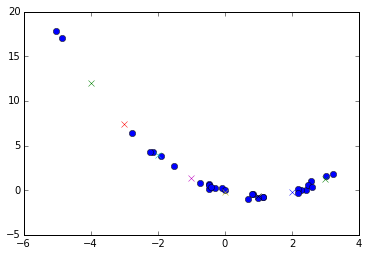

In [84]:
#Author Ozlem Akbas
#Python 2 was used

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import scipy as sc
import scipy.linalg as la

# Use this code to generate a dataset
N = 30
K = 4
s = 0.1
q = 10*s

x = 2*np.random.randn(N)
e = np.sqrt(s) * np.random.randn(N)

# Create the vandermonde matrix
A = x.reshape((N,1))**np.arange(K).reshape(1,K)
w = np.array([0,-1,0.5,0])
y = np.dot(A, w) + e

def prediction_Gauss (x_new,K,A_old,y_old):
    I = np.eye(K)
    # Assume p=2
    P = np.dot(I,2)
    N_new = 1
    # A_new
    A_new = x_new.reshape((N_new,1))**np.arange(K).reshape(1,K)
    
    M = (1/s) * np.dot(A_old.T, A_old) + la.inv(P)
    predic_sig = la.inv(M)
    predic_sig = np.dot(A_new,predic_sig)
    predic_sig = np.dot(predic_sig,A_new.T)
    
    predic_mu = (1/s) * np.dot(A_new, la.inv(M))
    predic_mu = np.dot(predic_mu, A_old.T)
    predic_mu = np.dot(predic_mu,y_old)
    return (predic_mu,predic_sig,x_new, N_new)

plt.plot(x, y, 'o')

for num in range(-4,4,1):
    # x_new
    x_n = np.array([num])
    mu_new, sigma_new, x_n, N_n = prediction_Gauss(x_n,K,A,y)
    y_new = np.random.normal(mu_new, sigma_new, N_n)
    plt.plot(x_n, y_new, 'x')

#plt.errorbar(x_n, y_new, yerr=(sigma_new, sigma_new), marker='o')
#plt.plot(e)
plt.show()
